## 1. Continuous-type Random Variable

We spoke about RVs that can take values from universal set $\Omega$ which is either finit or countably infinite; these were discrete-type random variables. But what if $\Omega$ is uncountably infinite,i.e. what if random variable $X$ can take any real number as a value? Then we have *(absolutely) continuous* random variable.

As with discrete-type RVs, continuous-type RVs have their distribution. With discrete RVs we use probability mass function (p.m.f) to describe their distribution. With continuous RVs, we have *probability density function (p.d.f)* which 'describes' them. One p.d.f. $\varphi(x)$ of a coninuous random variable may look like this:


**UBACI SLIKU**

Each p.d.f of a continuous RV should be defined, continuous and non-negative on the whole real-number line, and:

$$\int_{-\infty}^{+\infty}\varphi(x)dx = 1.$$

Don't worry about the integral - we are not going to compute integrals in this course. But we do need them to calculate probabilities for continuous RVs. The integral above tells us that the area under the curve of p.d.f. is always equal to 1. This seems familiar? This is actually completely analogous to the fact that, for discrete RV, all probabilities in its p.m.f. need always to sum to 1. 


So, what's the probability of RV, having p.d.f as in the figure above, to take value -5.5? It's

$$P(X = -5.5) = 0.$$

OK, that kinda makes sense. But, what about the probability of taking value 0?

$$P(X = 0) = 0.$$

Wait, what? And taking value $\sqrt{2}$?

$$P(X = \sqrt{2}) = 0.$$

Is it always going to be zero? Yes. Because the probability of hitting a point exactly you want, out of uncountably infinitely many others is - of course, zero. But how we can calculate probabilities at all, if the probability of every point is zero? We just need to broaden our views - not to ask about the probability of hitting a single point $x$ among ridiculously infinitely many, but to ask about the probability of hitting any point in the small interval $\Delta x$ which contains $x$... and uncountably infinite many other points. When working with continuous RVs we can hope to get positive probability only if we work with intervals, no matter how big or small. 

However, to get positive probabilities, those intervals need to be either fully or partially on the *support* of p.d.f. Support is the part of p.d.f. curve where this function is positive, i.e. $\varphi(x) > 0$. For really small intervals $\Delta x$ that are outside of the support, i.e. for which $\varphi(x) = 0$, there is 0 probability for RV $X$ to take any value from that interval. On the other hand, if we observe a really small interval $\Delta x$ around the point where p.d.f. takes its maximal value - there is the highest probability of RV $X$ taking values from this interval. 

In other words: higher the value of $\varphi(x)$ for some $x$ - higher the probability of RV $X$ getting some value from a very small interval $\Delta x$ around $x$. (but not in $x$ itself; there, the probability is zero)

***

So, we can calculate probability of continuous RV in any interval. How do we calculate probability of RV $X$ taking values in some interval $[a, b]$ where $a$ and $b$ are two numbers? Simply, using the formula:

$$P(a \leqslant X \leqslant b) = \int_a^b\varphi(x)dx.$$

It's that integral again... And again it makes sense again. Remember that, using Kolmogorov Axioms, we defined probability as a measure? We also mentioned that integral is the measure of the area under the curve. So, using an integral to measure area under the curve of p.d.f on some interval $[a,b]$, we are actually measuring the probability of RV $X$ to take any value from that interval.

Observing probabilites as integrals, i.e. areas of surfaces under the p.d.f curve is completely in-sync with Kolmogorov Axioms for probability-as-a-measure:

- Both probability and area are measures, and cannot be negative;
- Area of an empty set, or a point/line is zero. So is the probability;
- Bigger the area, bigger the probability; and we may encompass big areas by taking long intervals or intervals around high values of p.d.f;
- We can just sum areas of disjoint figures to get the total area; the same is for probabilities of disjoint events.

One more important point. We saw that for discrete RVs every point matters (even if it's infinite). For some discrete RV $X$ we have

$$P(X \leqslant k) \neq P(X < k).$$

However, this is not the case with continuous RVs; there one point doesn't make a difference (why?). So, for some continuous RV $X$ we have

$$P(a \leqslant X \leqslant b) = P(a \leqslant X < b) = P(a < X < b).$$

***

As discrete RVs have c.d.f, so continuous RVs have one as well. Cumulative distribution function for a continuous random variable is given with 

$$F(a) = P(X\leqslant a) = \int_{-\infty}^a\varphi(x)dx.$$

C.d.f of a continuous RV $X$ gives the probability of $X$ taking any value from the interval $(-\infty, a]$. Or, area under the p.d.f curve on that interval. Here's how one c.d.f. of a continuous RV looks like:

**UBACI SLIKU**

C.d.f. is a prety handy tool for computing probabilities of continuous RVs, even more useful than p.d.f! In fact, by knowing the c.d.f we can compute probabilites while avoiding integrals, using this formula:

$$P(a \leqslant X \leqslant b) = F(b) - F(a).$$

***

For continuous RVs very useful is *quantile function*, which is the inverse of a c.d.f:

$$Q(p) = F^{-1}(p).$$

Simply put, for $p = 0.1$ we can get a value $x$ for which we can expect to find 10% of points in the interval $(-\infty, x]$ when sampling from a RV $X$ having c.d.f $F$. 

The most important values for $p$ for the quantile functions are 0.25, 0.5 and 0.75, which give values for quartiles Q1, Q2 (median) and Q3. 

## 2. Continuous-type Random Variable Distributions

Enough of theoretical talk, and let's do some coding now. 

In [1]:
import numpy as np
import pandas as pd
import scipy
import math
import matplotlib.pyplot as plt
import seaborn as sns

rng = np.random.default_rng(seed=1023)

### Continuous Uniform Distribution

Continuous Uniform Distribution $\mathcal{U}[a, b]$ describes an experiment where there is an arbitrary outcome that lies in the interval $[a, b]$. In other words, we can equally expect any number in the interval $[a, b]$; no part of this interval is favoured than the other. 

We can sample from from Uniform Distribution on [0, 1] interval using `rng.random()`:

In [2]:
rng.random()

0.3388690800085262

In [3]:
rng.random(size=10)

array([0.90589874, 0.90960195, 0.74722338, 0.82310232, 0.26763656,
       0.08770086, 0.26731961, 0.70165033, 0.77665833, 0.37364504])

By sampling big enough sample from $\mathcal{U}[0, 1]$ we might get a sense of how its p.d.f looks like.

In [71]:
def sample_from_uniform(sample_size=10**6):
    
    fig, ax = plt.subplots(3, 1, figsize=(24, 18))
    
    outcomes = rng.random(size=sample_size)
    
    sns.histplot(ax=ax[0], x=outcomes, bins=10, stat='density')
    sns.histplot(ax=ax[1], x=outcomes, bins=10, stat='probability')
    sns.histplot(ax=ax[2], x=outcomes, bins=10, stat='probability', cumulative=True)
    
    ax[0].set_xticks(np.arange(0, 1.1, .1))
    ax[1].set_xticks(np.arange(0, 1.1, .1))
    ax[0].set_xticks(np.arange(0, 1.1, .1))

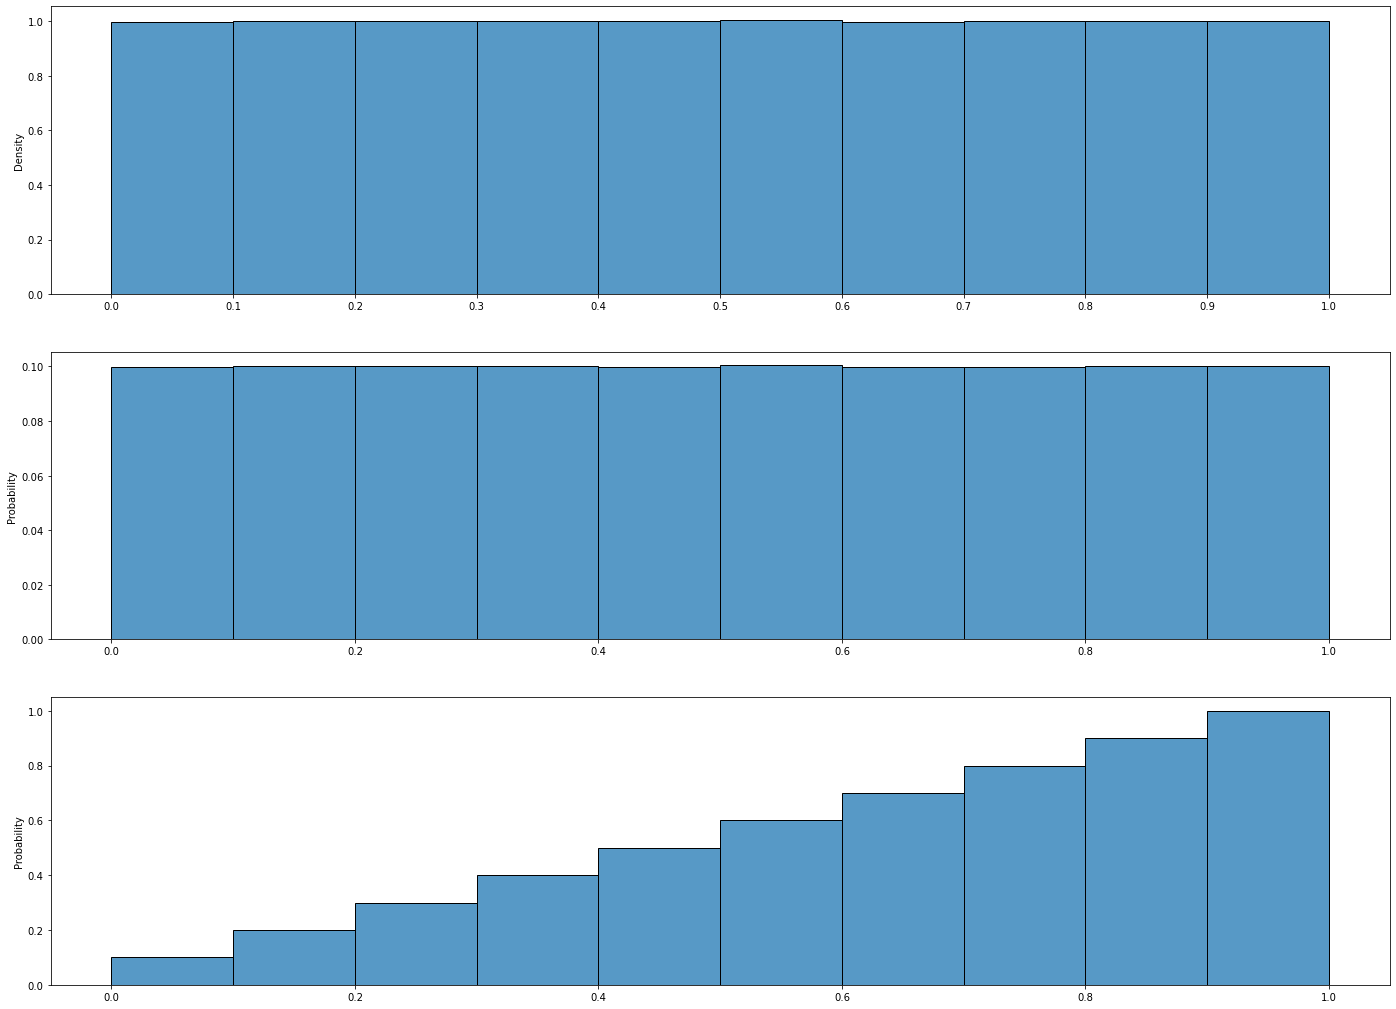

In [72]:
sample_from_uniform(sample_size=10**6)